#### Import numpy, matplotlib.pyplot

In [651]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import r2_score

## Generating Dataset

In [652]:
a = -1
b= 2
x = np.linspace(0,20,num=100)
y = a * x + b + np.random.normal(0,1,x.shape)

In [653]:
print(x.shape)
print(y.shape)

(100,)
(100,)


#### Plot data points. 

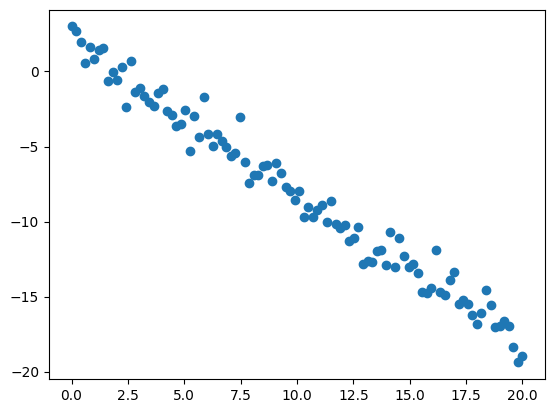

In [654]:
plt.scatter(x,y)

In [655]:
def GD(x,y,alpha,max_iter):
    theta0 = 0
    theta1 = 0
    tolerance = 1e-3
    loss_list = []
    thetas_list = []
    hyothesis_list = []
    epochs = 0
    for _ in range(max_iter):
        hypo = theta0 + theta1 * x
        hyothesis_list.append(hypo)
        J = (1/(2*len(x))) * np.sum((hypo - y)**2)
        loss_list.append(J)
        gradient_0 = (1/ len(x)) * np.sum((hypo - y))
        gradient_1 = (1/ len(x)) * np.sum((hypo - y)* x) 
        theta0 -= alpha * gradient_0
        theta1 -= alpha * gradient_1
        thetas_list.append([theta0 , theta1])
        if len(loss_list) > 1 and abs(loss_list[-1] - loss_list[-2]) < tolerance:
            break
        epochs +=1
    return thetas_list , loss_list , hyothesis_list ,hypo, epochs ,gradient_0 , gradient_1 , theta0 , theta1

In [656]:
thetas_list , loss_list , hyothesis_list ,hypo,epochs ,gradient_0 , gradient_1 , theta0 , theta1 = GD(x,y,0.001,10000)

In [657]:
print("Epochs : " , epochs)
print("Final Loss : " , loss_list[-1])
print("R2 Score : " ,r2_score(y, hypo))

Epochs :  35
Final Loss :  0.8734073762920648
R2 Score :  0.9499131636085832


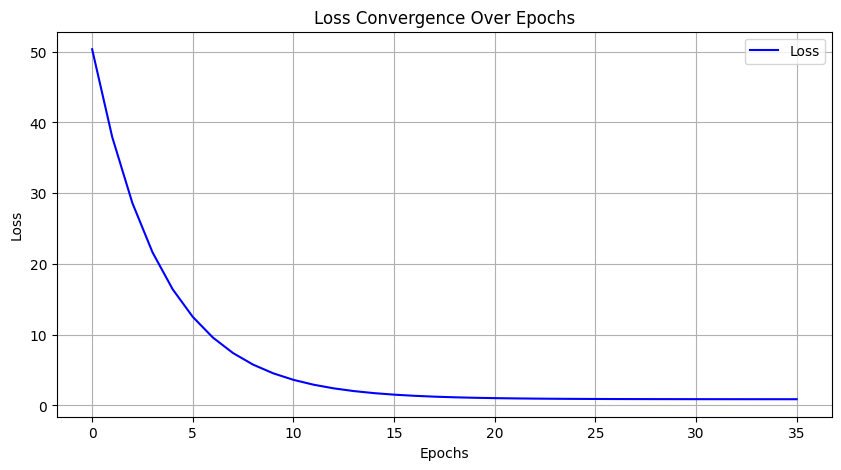

In [658]:
plt.figure(figsize=(10, 5))
plt.plot(loss_list, linestyle='-', color='b', label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

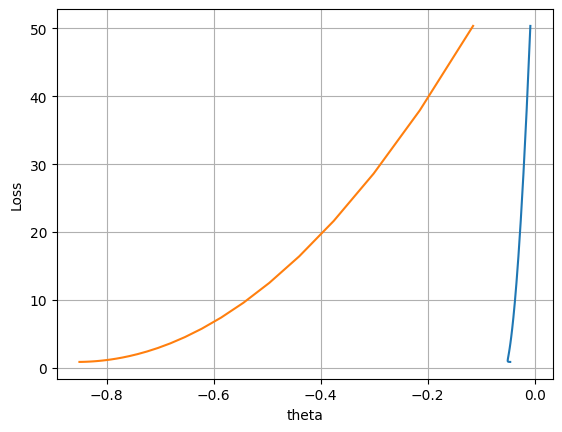

In [659]:
plt.plot(thetas_list, loss_list)
plt.xlabel("theta")
plt.ylabel("Loss")
plt.grid()

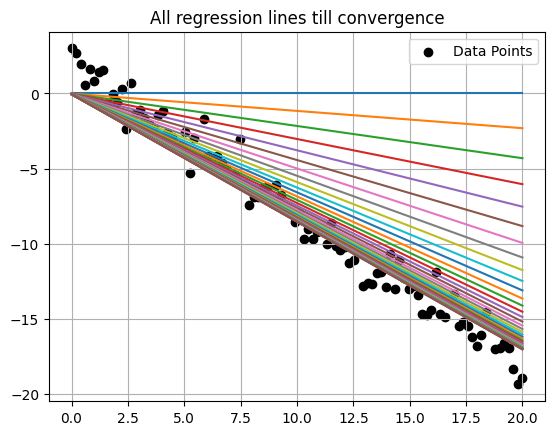

In [660]:
for i in range(len(hyothesis_list)):
    plt.plot(x,hyothesis_list[i])
plt.scatter(x,y , c='black',label='Data Points')
plt.title("All regression lines till convergence")
plt.legend()
plt.grid()

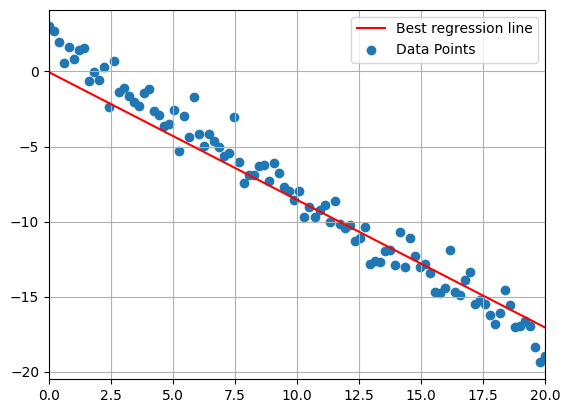

In [661]:
plt.plot(x,hyothesis_list[-1] , c='r' , label = 'Best regression line')
plt.scatter(x,y , label='Data Points')
plt.xlim(0,20)
plt.legend()
plt.grid()

### Updating Batch GD for one variable  implementation to be Momentum-Based GD and checking results

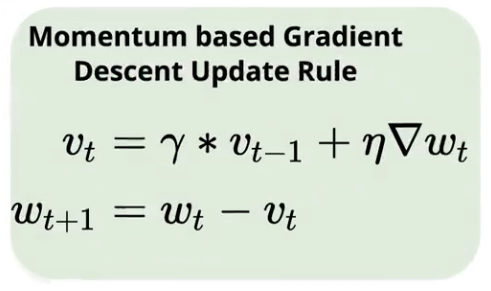

#### γ takes values between 0 and 1.
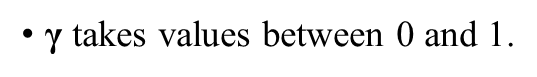

In [662]:
def Momentum_GD(x,y,alpha,max_iter , gamma=0.9):
    theta0 = 0
    theta1 = 0
    v1 = 0
    v0 = 0 
    tolerance = 1e-3
    loss_list = []
    thetas_list = []
    hyothesis_list = []
    epochs = 0
    for _ in range(max_iter):
        hypo = theta0 + theta1 * x
        hyothesis_list.append(hypo)
        
        J = (1/(2*len(x))) * np.sum((hypo - y)**2)
        loss_list.append(J)
        
        gradient_0 = (1/ len(x)) * np.sum((hypo - y))
        gradient_1 = (1/ len(x)) * np.sum((hypo - y)* x) 

        v0 = gamma * v0 + alpha * gradient_0
        v1 = gamma * v1 + alpha * gradient_1

        theta0 -= v0
        theta1 -= v1
        thetas_list.append([theta0 , theta1])
        
        if len(loss_list) > 1 and abs(loss_list[-1] - loss_list[-2]) < tolerance:
            break
        epochs +=1
    return thetas_list , loss_list , hyothesis_list , hypo , epochs , gradient_0 , gradient_1 , theta0 , theta1

In [663]:
thetas_list , loss_list , hyothesis_list , hypo , epochs , gradient_0 , gradient_1 , theta0 , theta1 = Momentum_GD(x,y,0.001,10000,0.9)

In [664]:
print("Epochs : " , epochs)
print("Final Loss : " , loss_list[-1])
print("R2 Score : " ,r2_score(y, hypo))

Epochs :  75
Final Loss :  0.7574974018222129
R2 Score :  0.9565601923433892


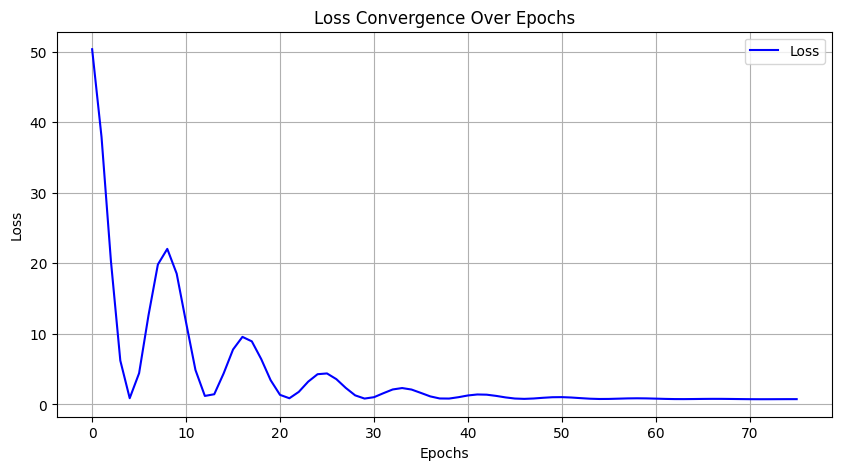

In [665]:
plt.figure(figsize=(10, 5))
plt.plot(loss_list, linestyle='-', color='b', label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

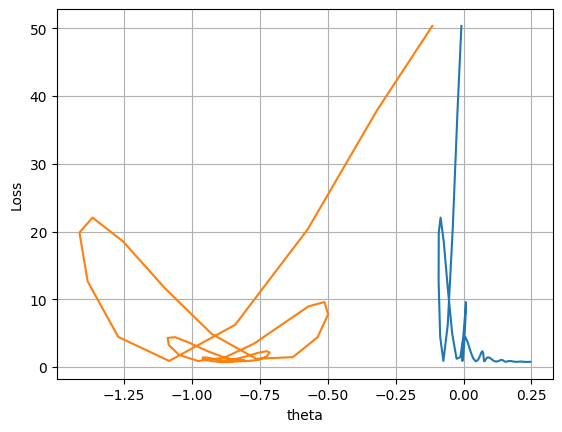

In [666]:
plt.plot(thetas_list, loss_list)
plt.xlabel("theta")
plt.ylabel("Loss")
plt.grid()

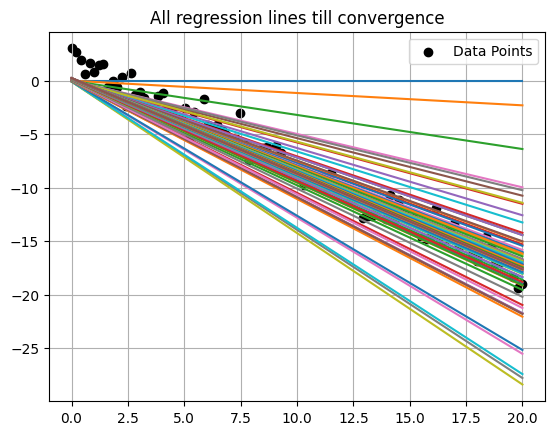

In [667]:
for i in range(len(hyothesis_list)):
    plt.plot(x,hyothesis_list[i])
plt.scatter(x,y , c='black',label='Data Points')
plt.title("All regression lines till convergence")
plt.legend()
plt.grid()

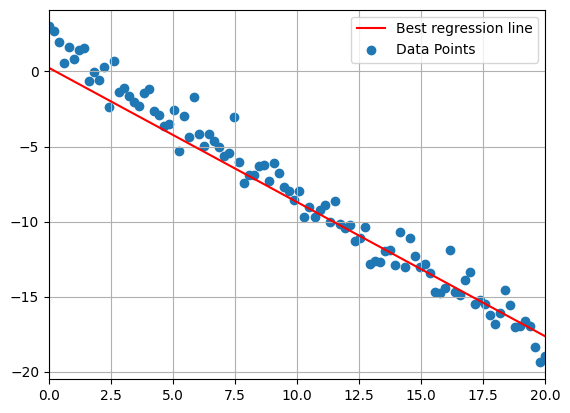

In [668]:
plt.plot(x,hyothesis_list[-1] , c='r' , label = 'Best regression line')
plt.scatter(x,y , label='Data Points')
plt.xlim(0,20)
plt.legend()
plt.grid()

#### Trying another values of momentum term
#### Trying very large values close to one and very small values close to zero. 
#### Trying momentum = 0

In [669]:
thetas_list , loss_list , hyothesis_list , hypo , epochs , gradient_0 , gradient_1 , theta0 , theta1 = Momentum_GD(x,y,0.001,10000,0.99)
print("Epochs : " , epochs)
print("Final Loss : " , loss_list[-1])
print("R2 Score : " , r2_score(y,hypo))

Epochs :  590
Final Loss :  0.39632734870311537
R2 Score :  0.9772720226428465


In [670]:
thetas_list , loss_list , hyothesis_list , hypo , epochs , gradient_0 , gradient_1 , theta0 , theta1 = Momentum_GD(x,y,0.001,10000,0.9)
print("Epochs : " , epochs)
print("Final Loss : " , loss_list[-1])
print("R2 Score : " , r2_score(y,hypo))

Epochs :  75
Final Loss :  0.7574974018222129
R2 Score :  0.9565601923433892


In [671]:
thetas_list , loss_list , hyothesis_list , hypo , epochs , gradient_0 , gradient_1 , theta0 , theta1 = Momentum_GD(x,y,0.001,10000,0.2)
print("Epochs : " , epochs)
print("Final Loss : " , loss_list[-1])
print("R2 Score : " , r2_score(y,hypo))

Epochs :  27
Final Loss :  0.8732544670359905
R2 Score :  0.9499219324157855


In [672]:
thetas_list , loss_list , hyothesis_list , hypo , epochs , gradient_0 , gradient_1 , theta0 , theta1 = Momentum_GD(x,y,0.001,10000,0)
print("Epochs : " , epochs)
print("Final Loss : " , loss_list[-1])
print("R2 Score : " , r2_score(y,hypo))

Epochs :  35
Final Loss :  0.8734073762920648
R2 Score :  0.9499131636085832


### Updating Batch GD for one variable implementation to be AdaGrad

In [673]:
def AdaGrad_GD(x, y, alpha, max_iter, epsilon=1e-8):
    theta0 = 0
    theta1 = 0
    G0 = 0  
    G1 = 0  
    tolerance = 1e-3
    loss_list = []
    thetas_list = []
    hypothesis_list = []
    epochs = 0

    for _ in range(max_iter):
        hypo = theta0 + theta1 * x
        hypothesis_list.append(hypo)

        J = (1 / (2 * len(x))) * np.sum((hypo - y) ** 2)
        loss_list.append(J)

        gradient_0 = (1 / len(x)) * np.sum((hypo - y))
        gradient_1 = (1 / len(x)) * np.sum((hypo - y) * x)

        G0 += gradient_0 ** 2
        G1 += gradient_1 ** 2

        theta0 -= (alpha / np.sqrt(G0 + epsilon)) * gradient_0
        theta1 -= (alpha / np.sqrt(G1 + epsilon)) * gradient_1

        thetas_list.append([theta0, theta1])

        if len(loss_list) > 1 and abs(loss_list[-1] - loss_list[-2]) < tolerance:
            break

        epochs += 1

    return thetas_list, loss_list, hypothesis_list, hypo, epochs, gradient_0, gradient_1, theta0, theta1


In [674]:
thetas_list , loss_list , hyothesis_list , hypo , epochs , gradient_0 , gradient_1 , theta0 , theta1 = AdaGrad_GD(x,y,0.01,10000)
print("Epochs : " , epochs)
print("R2 Score : " , r2_score(y,hypo))
print("Final Loss : " , loss_list[-1])

Epochs :  2605
R2 Score :  0.881165868579703
Final Loss :  2.0722132683056493


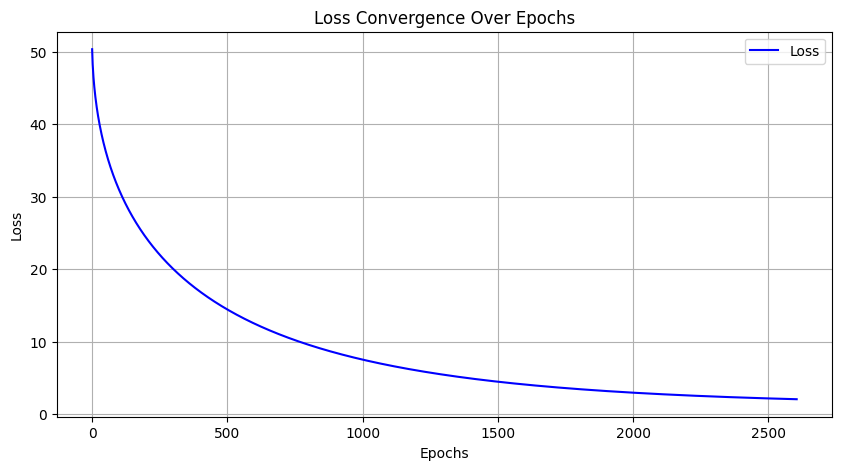

In [675]:
plt.figure(figsize=(10, 5))
plt.plot(loss_list, linestyle='-', color='b', label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

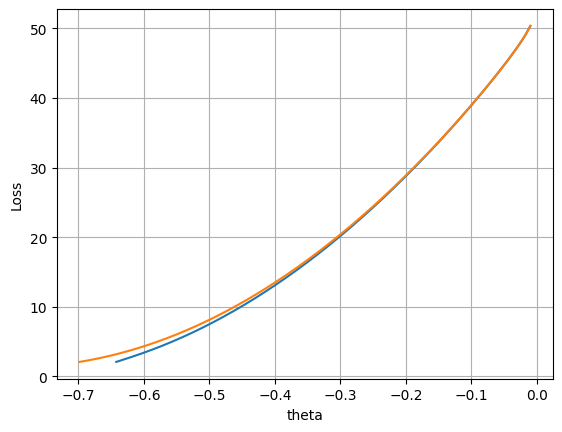

In [676]:
plt.plot(thetas_list, loss_list)
plt.xlabel("theta")
plt.ylabel("Loss")
plt.grid()

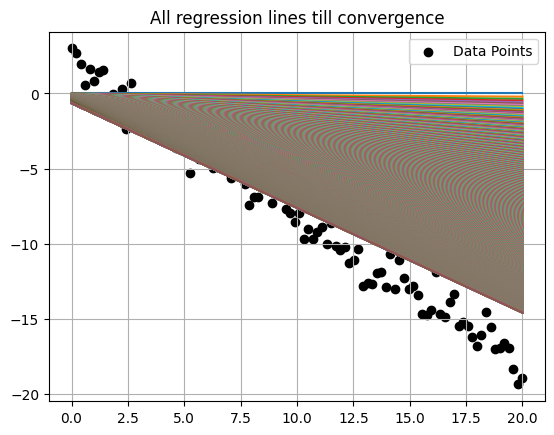

In [677]:
for i in range(len(hyothesis_list)):
    plt.plot(x,hyothesis_list[i])
plt.scatter(x,y , c='black',label='Data Points')
plt.title("All regression lines till convergence")
plt.legend()
plt.grid()

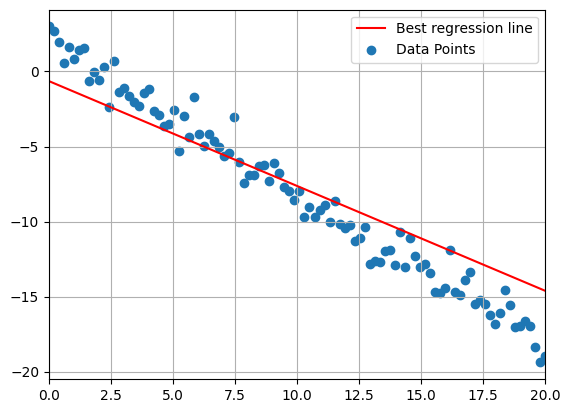

In [678]:
plt.plot(x,hyothesis_list[-1] , c='r' , label = 'Best regression line')
plt.scatter(x,y , label='Data Points')
plt.xlim(0,20)
plt.legend()
plt.grid()

### Updating Batch GD for one variable  implementation to be RMSProp

In [679]:
def RMSProp_GD(x, y, alpha, max_iter, beta=0.9, epsilon=1e-8):
    theta0 = 0
    theta1 = 0
    G0 = 0  
    G1 = 0  
    tolerance = 1e-3
    loss_list = []
    thetas_list = []
    hypothesis_list = []
    epochs = 0

    for _ in range(max_iter):
        hypo = theta0 + theta1 * x
        hypothesis_list.append(hypo)

        J = (1 / (2 * len(x))) * np.sum((hypo - y) ** 2)
        loss_list.append(J)

        gradient_0 = (1 / len(x)) * np.sum((hypo - y))
        gradient_1 = (1 / len(x)) * np.sum((hypo - y) * x)

        G0 = beta * G0 + (1 - beta) * gradient_0 ** 2
        G1 = beta * G1 + (1 - beta) * gradient_1 ** 2

        theta0 -= (alpha / np.sqrt(G0 + epsilon)) * gradient_0
        theta1 -= (alpha / np.sqrt(G1 + epsilon)) * gradient_1

        thetas_list.append([theta0, theta1])

        if len(loss_list) > 1 and abs(loss_list[-1] - loss_list[-2]) < tolerance:
            break

        epochs += 1

    return thetas_list, loss_list, hypothesis_list, hypo, epochs, gradient_0, gradient_1, theta0, theta1


In [680]:
thetas_list , loss_list , hyothesis_list , hypo , epochs , gradient_0 , gradient_1 , theta0 , theta1 = RMSProp_GD(x,y,0.01,10000)
print("Epochs : " , epochs)
print("R2 Score : " , r2_score(y,hypo))
print("Final Loss : " , loss_list[-1])

Epochs :  197
R2 Score :  0.959738183604214
Final Loss :  0.7020800265401148


### Updating Batch GD for one variable  implementation to be ADAM

In [681]:
def Adam_GD(x, y, alpha, max_iter, beta1=0.9, beta2=0.999, epsilon=1e-8):
    theta0 = 0
    theta1 = 0
    m0, m1 = 0, 0  
    v0, v1 = 0, 0  
    
    tolerance = 1e-3
    loss_list = []
    thetas_list = []
    hypothesis_list = []
    epochs = 0

    for t in range(1, max_iter + 1):  
        hypo = theta0 + theta1 * x
        hypothesis_list.append(hypo)

        J = (1 / (2 * len(x))) * np.sum((hypo - y) ** 2)
        loss_list.append(J)

        gradient_0 = (1 / len(x)) * np.sum((hypo - y))
        gradient_1 = (1 / len(x)) * np.sum((hypo - y) * x)

        m0 = beta1 * m0 + (1 - beta1) * gradient_0
        m1 = beta1 * m1 + (1 - beta1) * gradient_1

        v0 = beta2 * v0 + (1 - beta2) * (gradient_0 ** 2)
        v1 = beta2 * v1 + (1 - beta2) * (gradient_1 ** 2)

        m0_hat = m0 / (1 - beta1 ** t)
        m1_hat = m1 / (1 - beta1 ** t)

        v0_hat = v0 / (1 - beta2 ** t)
        v1_hat = v1 / (1 - beta2 ** t)

        theta0 -= (alpha / (np.sqrt(v0_hat) + epsilon)) * m0_hat
        theta1 -= (alpha / (np.sqrt(v1_hat) + epsilon)) * m1_hat

        thetas_list.append([theta0, theta1])

        if len(loss_list) > 1 and abs(loss_list[-1] - loss_list[-2]) < tolerance:
            break

        epochs += 1

    return thetas_list, loss_list, hypothesis_list, hypo, epochs, gradient_0, gradient_1, theta0, theta1


In [682]:
thetas_list , loss_list , hyothesis_list , hypo , epochs , gradient_0 , gradient_1 , theta0 , theta1 = Adam_GD(x,y,0.01,10000)
print("Epochs : " , epochs)
print("R2 Score : " , r2_score(y,hypo))
print("Final Loss : " , loss_list[-1])

Epochs :  563
R2 Score :  0.9580358422950086
Final Loss :  0.7317652205660942


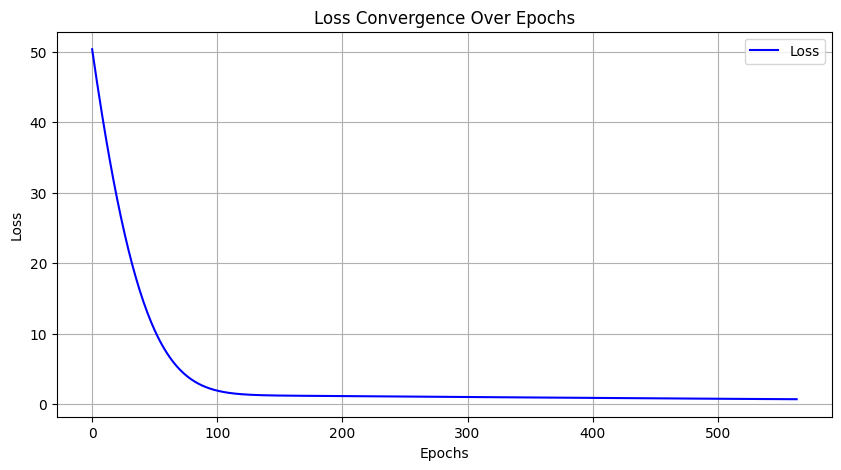

In [683]:
plt.figure(figsize=(10, 5))
plt.plot(loss_list, linestyle='-', color='b', label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

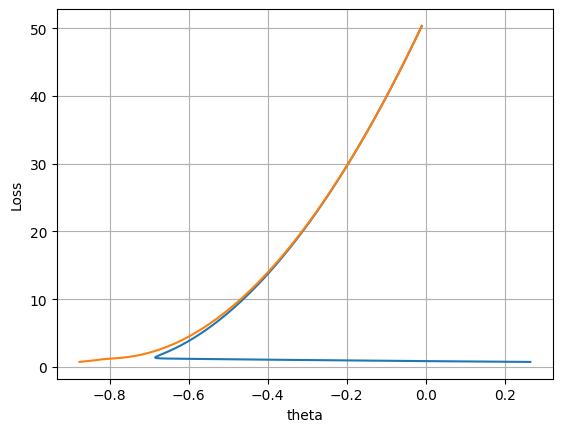

In [684]:
plt.plot(thetas_list, loss_list)
plt.xlabel("theta")
plt.ylabel("Loss")
plt.grid()

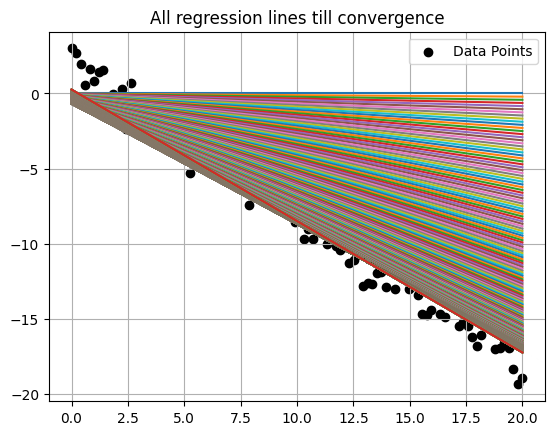

In [685]:
for i in range(len(hyothesis_list)):
    plt.plot(x,hyothesis_list[i])
plt.scatter(x,y , c='black',label='Data Points')
plt.title("All regression lines till convergence")
plt.legend()
plt.grid()

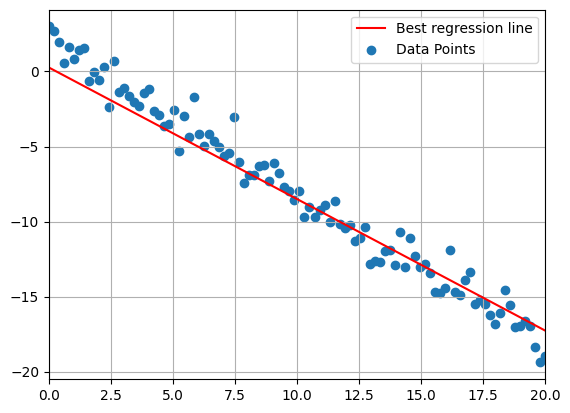

In [686]:
plt.plot(x,hyothesis_list[-1] , c='r' , label = 'Best regression line')
plt.scatter(x,y , label='Data Points')
plt.xlim(0,20)
plt.legend()
plt.grid()